In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# --- Configuration ---
# Set the base filepath where the CBIS-DDSM CSV files are located.
# IMPORTANT: Make sure the path you provided is correct.
filepath = r"C:\Users\New User\Documents\GitHub\breast-cancer-detection-project\data\raw\CBIS-DDSM\csv"

# Set the style for the plots for better aesthetics
sns.set_style("whitegrid")
plt.style.use('seaborn-v0_8-talk')

# --- File Paths ---
mass_train_path = os.path.join(filepath, "mass_case_description_train_set.csv")
calc_train_path = os.path.join(filepath, "calc_case_description_train_set.csv")

# --- Load the Datasets ---
try:
    mass_train_df = pd.read_csv(mass_train_path)
    calc_train_df = pd.read_csv(calc_train_path)
    print("Successfully loaded the datasets.")
except FileNotFoundError as e:
    print(f"Error: {e}")
    print("\nPlease ensure the filepath is correct and the CSV files exist in that directory.")
    # Exit the script if files are not found
    exit()

Successfully loaded the datasets.



--- Analyzing Mass Training Set ---


C:\Users\New User\AppData\Local\Temp\ipykernel_29832\2849704976.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  shape_ax = sns.countplot(y=mass_train_df['mass shape'], order=mass_train_df['mass shape'].value_counts().index, palette='viridis')
C:\Users\New User\AppData\Local\Temp\ipykernel_29832\2849704976.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  margin_ax = sns.countplot(y=mass_train_df['mass margins'], order=mass_train_df['mass margins'].value_counts().index, palette='plasma')
C:\Users\New User\AppData\Local\Temp\ipykernel_29832\2849704976.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `lege

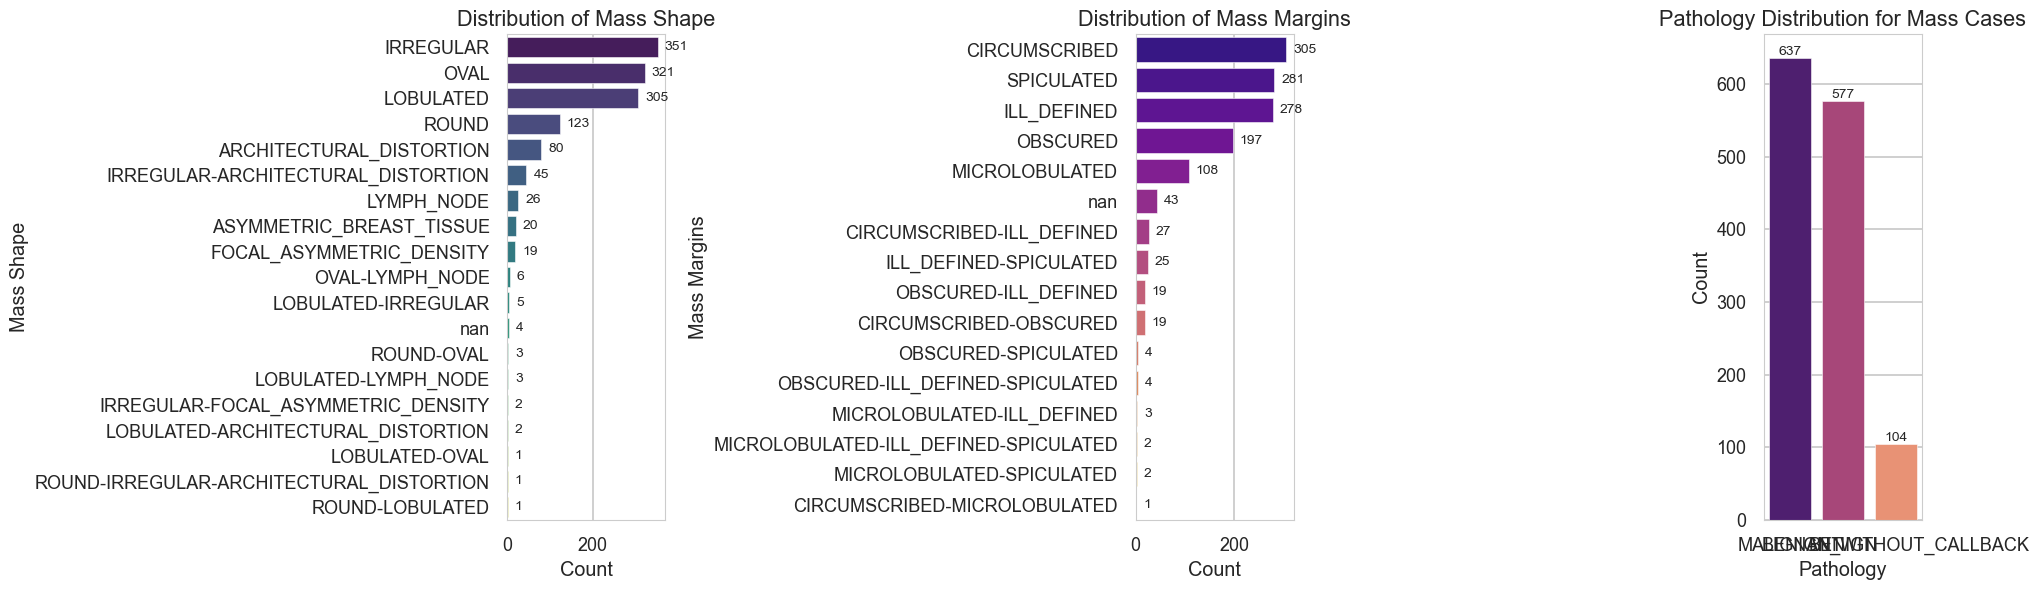

In [3]:
# ==============================================================================
# 1. Mass Abnormalities Analysis (Training Set)
# ==============================================================================
print("\n--- Analyzing Mass Training Set ---")

# Clean up column names by stripping whitespace
mass_train_df.columns = mass_train_df.columns.str.strip()

# Clean up data in the columns by stripping whitespace
# We will focus on the relevant columns for this analysis
mass_cols = ['mass shape', 'mass margins', 'pathology']
for col in mass_cols:
    if col in mass_train_df.columns:
        # Ensure the column is of string type before applying .str accessor
        mass_train_df[col] = mass_train_df[col].astype(str).str.strip()

plt.figure(figsize=(20, 6))

# a) Plotting the distribution of Mass Shape
plt.subplot(1, 3, 1)
shape_ax = sns.countplot(y=mass_train_df['mass shape'], order=mass_train_df['mass shape'].value_counts().index, palette='viridis')
plt.title('Distribution of Mass Shape')
plt.xlabel('Count')
plt.ylabel('Mass Shape')
for container in shape_ax.containers:
    shape_ax.bar_label(container, fmt='%d', label_type='edge', padding=5)

# b) Plotting the distribution of Mass Margins
plt.subplot(1, 3, 2)
margin_ax = sns.countplot(y=mass_train_df['mass margins'], order=mass_train_df['mass margins'].value_counts().index, palette='plasma')
plt.title('Distribution of Mass Margins')
plt.xlabel('Count')
plt.ylabel('Mass Margins')
for container in margin_ax.containers:
    margin_ax.bar_label(container, fmt='%d', label_type='edge', padding=5)

# c) Plotting the pathology distribution for Mass cases
plt.subplot(1, 3, 3)
mass_path_ax = sns.countplot(x=mass_train_df['pathology'], order=mass_train_df['pathology'].value_counts().index, palette='magma')
plt.title('Pathology Distribution for Mass Cases')
plt.xlabel('Pathology')
plt.ylabel('Count')
for container in mass_path_ax.containers:
    mass_path_ax.bar_label(container, fmt='%d', label_type='edge')

plt.tight_layout()
plt.show()

Mass Abnormality Analysis
The plots for the mass training set (E_1.png) provide a granular view of the characteristics of mass-type abnormalities.

Pathology Distribution: For masses specifically, there is a relatively balanced distribution between MALIGNANT (637 cases) and BENIGN (577 cases), with an additional 104 BENIGN_WITHOUT_CALLBACK cases. This near-parity in the primary classes is excellent for training a model to distinguish between benign and malignant masses.

Mass Shape Distribution: The distribution of mass shapes is heavily skewed. IRREGULAR (351), OVAL (321), and LOBULATED (305) are the dominant shapes. Other categories like ROUND (123) are less common, and there is a long tail of very rare, complex, or combined shape descriptions (e.g., ROUND-IRREGULAR-ARCHITECTURAL_DISTORTION with only 1 case). This "long-tail" problem means the model will have very few examples to learn from for these rare shapes.

Mass Margins Distribution: A similar pattern exists for mass margins. CIRCUMSCRIBED (365), SPICULATED (281), and ILL-DEFINED (278) are the most frequent. Again, we see a long tail of multi-descriptor margins and rare categories. The presence of nan (43 cases) indicates missing data that needs to be handled, likely through imputation or by treating it as a separate category.


--- Analyzing Calcification Training Set ---


C:\Users\New User\AppData\Local\Temp\ipykernel_29832\718097238.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  calc_type_ax = sns.countplot(
C:\Users\New User\AppData\Local\Temp\ipykernel_29832\718097238.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  calc_dist_ax = sns.countplot(
C:\Users\New User\AppData\Local\Temp\ipykernel_29832\718097238.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  calc_path_ax = sns.countplot(x=calc_train_df['pathology'], order=calc_train_df['pathology'].value_counts().index, palette='coolwarm')


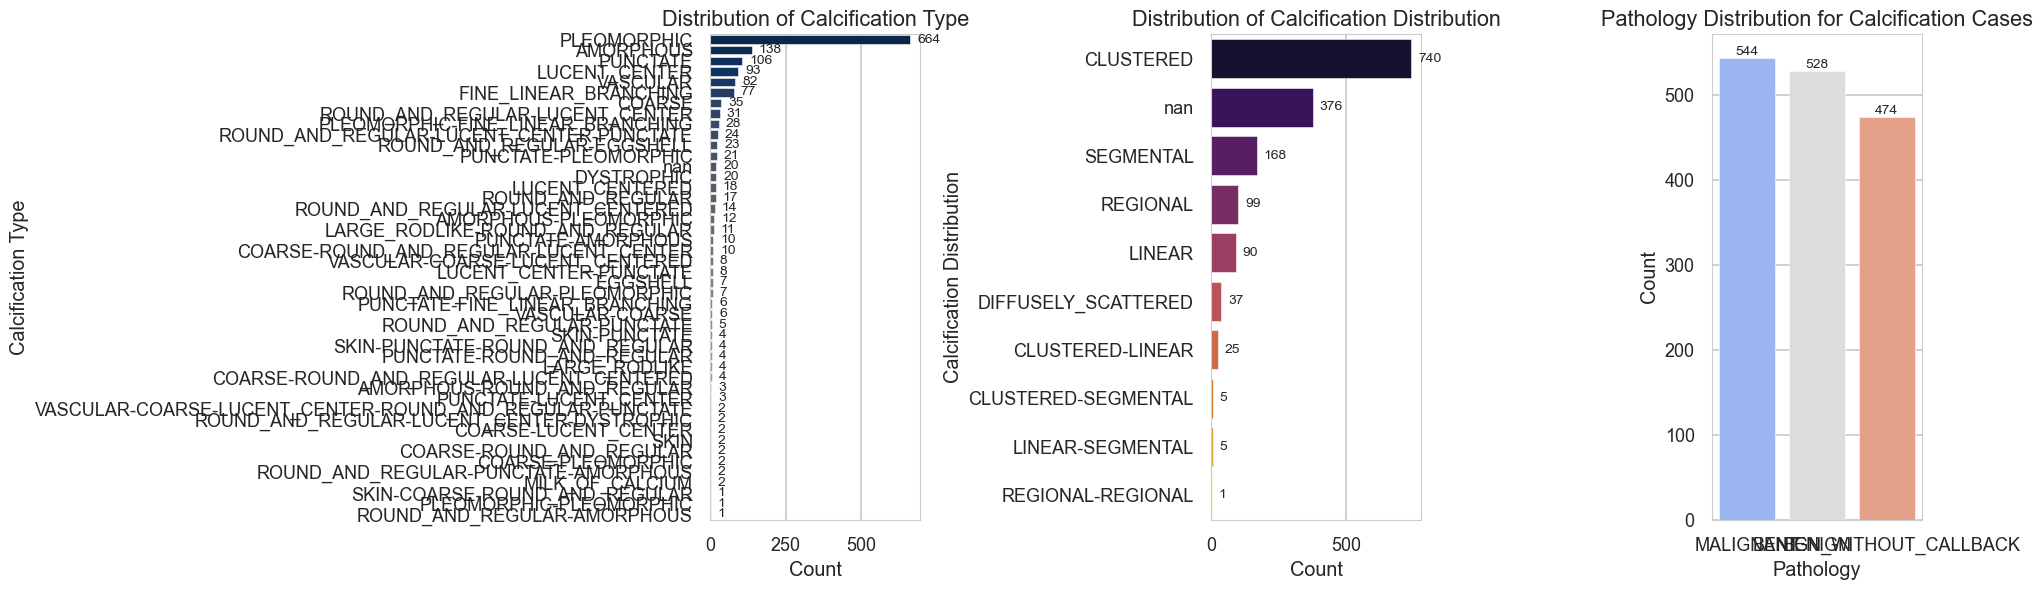

In [4]:
# ==============================================================================
# 2. Calcification Abnormalities Analysis (Training Set)
# ==============================================================================
print("\n--- Analyzing Calcification Training Set ---")

# Clean up column names and data
calc_train_df.columns = calc_train_df.columns.str.strip()
calc_cols = ['calc type', 'calc distribution', 'pathology']
for col in calc_cols:
     if col in calc_train_df.columns:
        calc_train_df[col] = calc_train_df[col].astype(str).str.strip()


plt.figure(figsize=(20, 6))

# a) Plotting the distribution of Calcification Type
plt.subplot(1, 3, 1)
calc_type_ax = sns.countplot(
    y=calc_train_df['calc type'],
    order=calc_train_df['calc type'].value_counts().index,
    palette='cividis'
)
plt.title('Distribution of Calcification Type')
plt.xlabel('Count')
plt.ylabel('Calcification Type')
for container in calc_type_ax.containers:
    calc_type_ax.bar_label(container, fmt='%d', label_type='edge', padding=5)

# b) Plotting the distribution of Calcification Distribution
plt.subplot(1, 3, 2)
calc_dist_ax = sns.countplot(
    y=calc_train_df['calc distribution'],
    order=calc_train_df['calc distribution'].value_counts().index,
    palette='inferno'
)
plt.title('Distribution of Calcification Distribution')
plt.xlabel('Count')
plt.ylabel('Calcification Distribution')
for container in calc_dist_ax.containers:
    calc_dist_ax.bar_label(container, fmt='%d', label_type='edge', padding=5)

# c) Plotting the pathology distribution for Calcification cases
plt.subplot(1, 3, 3)
calc_path_ax = sns.countplot(x=calc_train_df['pathology'], order=calc_train_df['pathology'].value_counts().index, palette='coolwarm')
plt.title('Pathology Distribution for Calcification Cases')
plt.xlabel('Pathology')
plt.ylabel('Count')
for container in calc_path_ax.containers:
    calc_path_ax.bar_label(container, fmt='%d', label_type='edge')


plt.tight_layout()
plt.show()


Calcification Abnormality Analysis
The calcification plots (E_2.jpg) highlight even greater complexity and data imbalance.

Pathology Distribution: The balance for calcification cases is also quite good between the primary classes: MALIGNANT (544 cases) and BENIGN (528 cases), with 474 cases of BENIGN_WITHOUT_CALLBACK.

Calcification Type Distribution: This is the most imbalanced feature observed. PLEOMORPHIC (664 cases) is overwhelmingly the most common type. The next most frequent, LUCENT_CENTER, has only 88 cases. The plot shows an extremely long tail of other calcification types, many with single-digit counts. This severe imbalance means a model might struggle to accurately classify any type other than Pleomorphic. The visual clutter in the graph itself is indicative of the data's complexity.

Calcification Distribution Distribution: While more balanced than calcification type, there is still a clear primary class: CLUSTERED (749 cases). SEGMENTAL (188) and REGIONAL (99) are the next most common. The presence of nan (179 cases) is also a significant data quality issue to address here.


--- Analyzing Overall Dataset Balance ---


C:\Users\New User\AppData\Local\Temp\ipykernel_29832\1065698895.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  overall_ax = sns.countplot(x=overall_pathology, order=overall_pathology.value_counts().index, palette='spring')


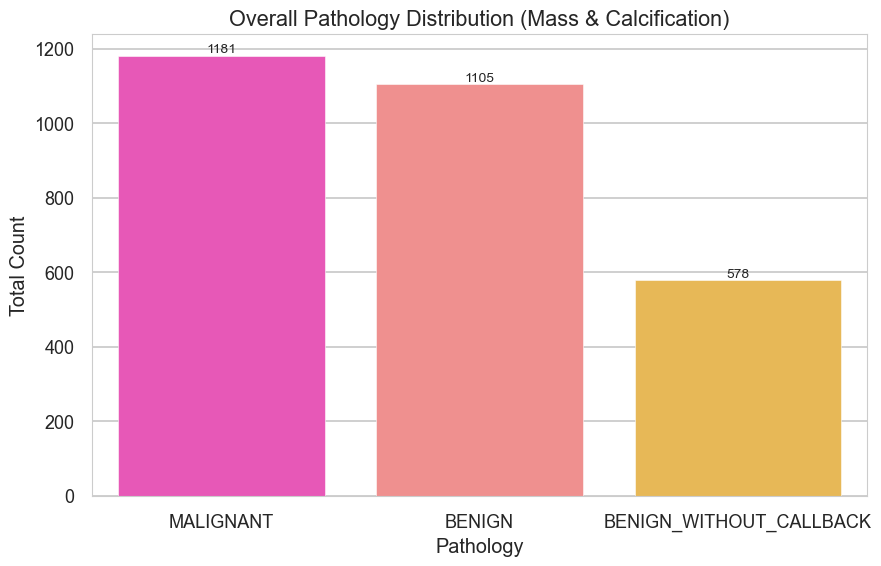


Analysis complete. The plots above show the distribution of different features in the CBIS-DDSM training set.


In [5]:
# ==============================================================================
# 3. Overall Dataset Balance (Mass + Calcification)
# ==============================================================================
print("\n--- Analyzing Overall Dataset Balance ---")

# Combine the pathology columns from both dataframes
overall_pathology = pd.concat([mass_train_df['pathology'], calc_train_df['pathology']], ignore_index=True)

# Plotting the overall pathology distribution
plt.figure(figsize=(10, 6))
overall_ax = sns.countplot(x=overall_pathology, order=overall_pathology.value_counts().index, palette='spring')
plt.title('Overall Pathology Distribution (Mass & Calcification)')
plt.xlabel('Pathology')
plt.ylabel('Total Count')
for container in overall_ax.containers:
    overall_ax.bar_label(container, fmt='%d', label_type='edge')

plt.show()

print("\nAnalysis complete. The plots above show the distribution of different features in the CBIS-DDSM training set.")

The overall pathology distribution graph (E_3.png) shows a significant class imbalance. The dataset is composed of:

1181 Malignant cases

1105 Benign cases

578 Benign_Without_Callback cases

This reveals a nearly even split between MALIGNANT and BENIGN cases, but the presence of the BENIGN_WITHOUT_CALLBACK category, which is essentially another form of benign, skews the overall balance. When combined, there are 1683 benign-type cases (1105 + 578) versus 1181 malignant cases. This is a moderate but significant imbalance that must be addressed during model training, potentially using techniques like class weighting, oversampling (e.g., SMOTE), or undersampling to prevent the model from developing a bias towards predicting the more frequent benign classes.

Key Insights and Implications for Machine Learning
Address Overall Class Imbalance: The ~1.4:1 ratio of benign-type to malignant cases needs to be handled to ensure the final model is not biased.

Beware of Long-Tail Distributions: For features like mass shape, mass margins, and especially calcification type, the model will not have enough data to learn the rare categories effectively. This could lead to poor performance on those specific cases. Strategies to consider include:

Grouping Rare Categories: Combine rare, clinically similar categories into a single "Other" or "Complex" category.

Feature Engineering: Create new, simpler features from the complex ones. For example, a binary feature for "IsCircumscribed" vs. "IsNotCircumscribed".

Handle Missing Data (nan): The nan values in mass margins and calcification distribution must be addressed. They can be filled with the most frequent value (mode), or treated as a distinct category if the "missingness" itself is predictive.

Data Cleaning is Essential: The presence of many multi-descriptor categories (e.g., ILL_DEFINED-SPICULATED) suggests that the data could benefit from cleaning and standardization to simplify the feature space.

Separate Models as an Option: Given the distinct characteristics and different levels of data complexity between mass and calcification abnormalities, it might be beneficial to train two separate models—one for mass classification and one for calcification classification—before combining their predictions.

In summary, while the CBIS-DDSM dataset is a powerful resource, your analysis correctly reveals that it is not a simple "plug-and-play" dataset. Careful preprocessing, thoughtful feature engineering, and strategies to handle class imbalance are essential next steps to build a successful and reliable diagnostic model.

Scanning for JPG files and reading dimensions...


Processing JPG files: 100%|██████████| 10237/10237 [00:05<00:00, 1937.19it/s]



--- Analysis Complete ---
Successfully analyzed 10237 JPG images.

Summary Statistics for Image Dimensions:
             height         width
count  10237.000000  10237.000000
mean    3549.778841   2179.893328
std     2363.196643   1374.221082
min       73.000000     68.000000
25%      441.000000    453.000000
50%     4624.000000   2728.000000
75%     5476.000000   3112.000000
max     7111.000000   5431.000000

Number of Unique Values:
Unique Heights: 1077
Unique Widths: 1208

Generating plots to visualize inconsistencies...


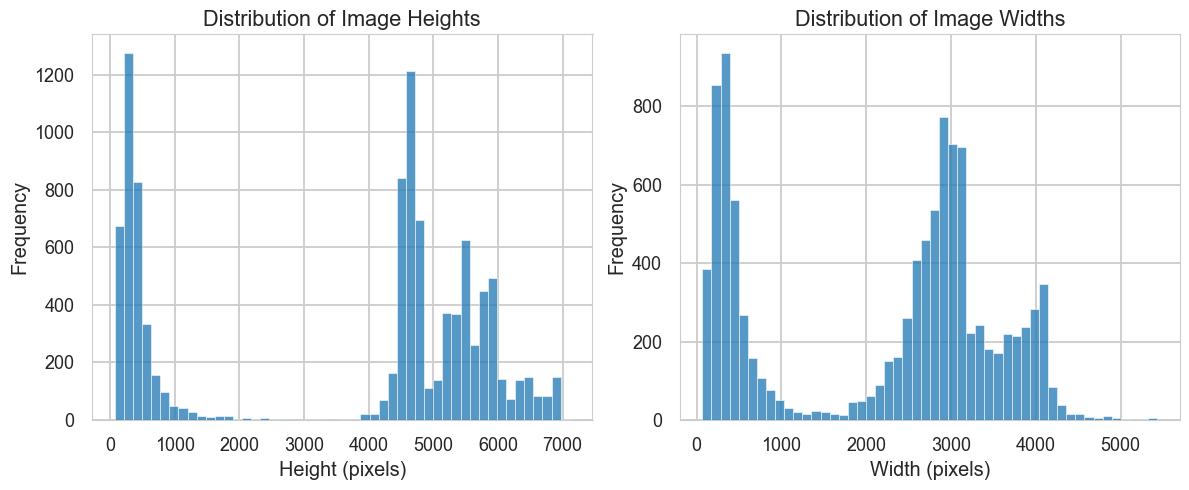

In [9]:
import os
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# --- Configuration ---
# IMPORTANT: Update this path to the root directory of your CBIS-DDSM dataset.
# This should be where the JPG image folders are located.
data_directory = r"C:\Users\New User\Documents\GitHub\breast-cancer-detection-project\data\raw\CBIS-DDSM"

# --- Analysis Function ---
def analyze_jpg_files(root_dir):
    """
    Scans a directory for JPG files, extracts their resolution (height and width),
    and returns it as a pandas DataFrame.
    """
    image_data = []
    
    # Check if the directory exists
    if not os.path.isdir(root_dir):
        print(f"Error: The directory '{root_dir}' does not exist.")
        print("Please update the 'data_directory' variable with the correct path.")
        return None

    # Use tqdm for a progress bar as this can take a while
    print("Scanning for JPG files and reading dimensions...")
    # Create a list of all files to process to get an accurate total for tqdm
    filepaths_to_process = []
    for subdir, _, files in os.walk(root_dir):
        for file in files:
            # Check for both .jpg and .jpeg extensions
            if file.lower().endswith(('.jpg', '.jpeg')):
                filepaths_to_process.append(os.path.join(subdir, file))

    if not filepaths_to_process:
        print("Error: No JPG (.jpg, .jpeg) files found in the specified directory.")
        print("Please ensure the path is correct and points to the CBIS-DDSM image data.")
        return None

    for file_path in tqdm(filepaths_to_process, desc="Processing JPG files"):
        try:
            # Open the image file and get its dimensions
            with Image.open(file_path) as img:
                width, height = img.size
            
            image_data.append({
                'file_path': file_path,
                'height': height,
                'width': width,
            })
        except Exception as e:
            print(f"Could not process file {file_path}: {e}")
            
    return pd.DataFrame(image_data)

# --- Main Execution ---
# Run the analysis
df_analysis = analyze_jpg_files(data_directory)

if df_analysis is not None and not df_analysis.empty:
    print("\n--- Analysis Complete ---")
    print(f"Successfully analyzed {len(df_analysis)} JPG images.\n")

    # --- Display Summary Statistics ---
    print("Summary Statistics for Image Dimensions:")
    # Using .describe() to show min, max, mean, etc.
    print(df_analysis[['height', 'width']].describe())
    
    # Check for number of unique values
    print("\nNumber of Unique Values:")
    print(f"Unique Heights: {df_analysis['height'].nunique()}")
    print(f"Unique Widths: {df_analysis['width'].nunique()}")

    # --- Plotting the Distributions ---
    print("\nGenerating plots to visualize inconsistencies...")
    sns.set_style("whitegrid")
    plt.figure(figsize=(12, 5))

    # 1. Histogram of Image Heights
    plt.subplot(1, 2, 1)
    sns.histplot(df_analysis['height'], kde=False, bins=50)
    plt.title('Distribution of Image Heights')
    plt.xlabel('Height (pixels)')
    plt.ylabel('Frequency')

    # 2. Histogram of Image Widths
    plt.subplot(1, 2, 2)
    sns.histplot(df_analysis['width'], kde=False, bins=50)
    plt.title('Distribution of Image Widths')
    plt.xlabel('Width (pixels)')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.savefig('image_dimensions_distribution.png', dpi=300)
    plt.show()



Successfully loaded the datasets.

--- Mask Counts per Abnormality Type ---
Total number of Mass masks: 1318
Total number of Calcification masks: 1546
Total masks in the combined training set: 2864

--- Generating Distribution Graphs ---


C:\Users\New User\AppData\Local\Temp\ipykernel_29832\600631769.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data[column_name], order=data[column_name].value_counts().index, palette=palette)


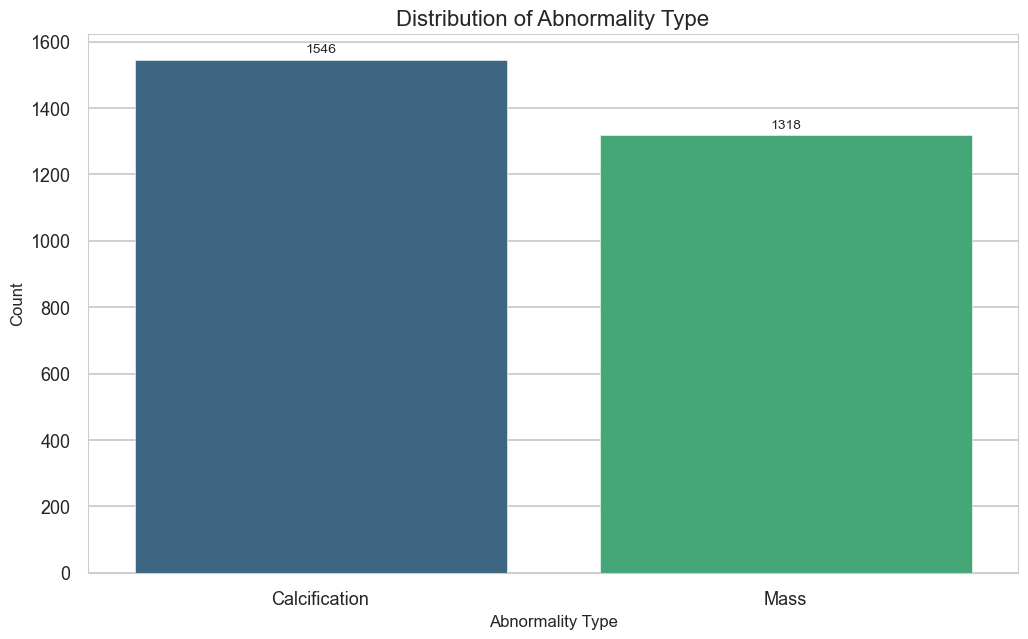

C:\Users\New User\AppData\Local\Temp\ipykernel_29832\600631769.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data[column_name], order=data[column_name].value_counts().index, palette=palette)


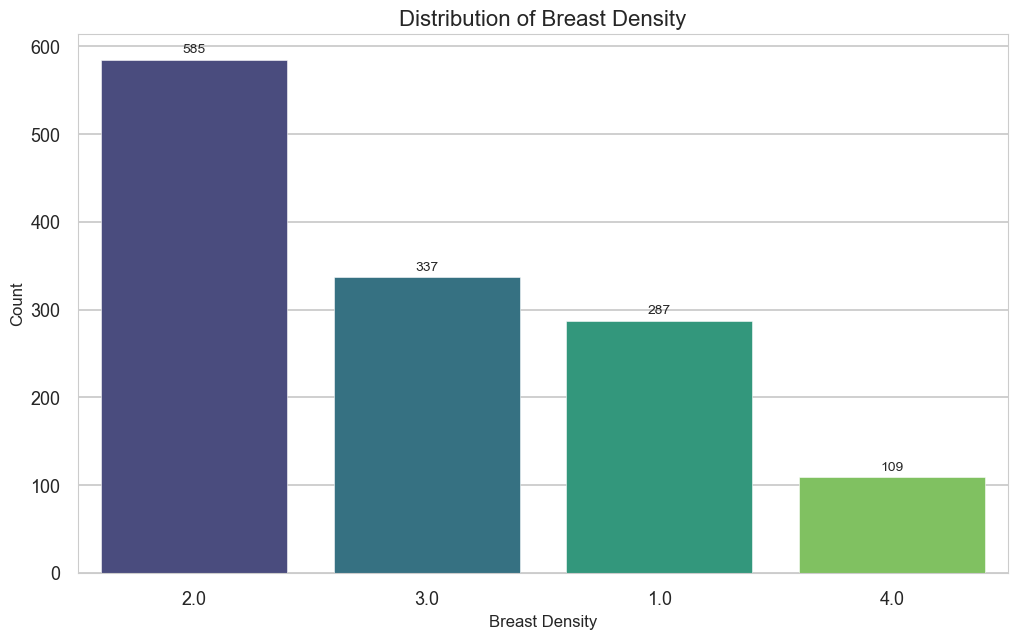

C:\Users\New User\AppData\Local\Temp\ipykernel_29832\600631769.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data[column_name], order=data[column_name].value_counts().index, palette=palette)


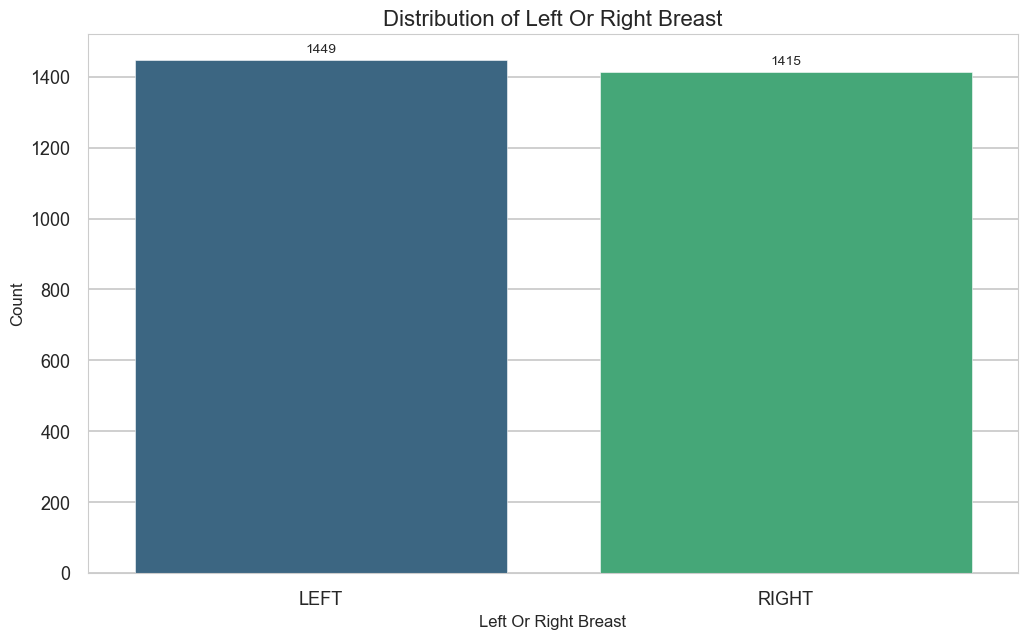

C:\Users\New User\AppData\Local\Temp\ipykernel_29832\600631769.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data[column_name], order=data[column_name].value_counts().index, palette=palette)


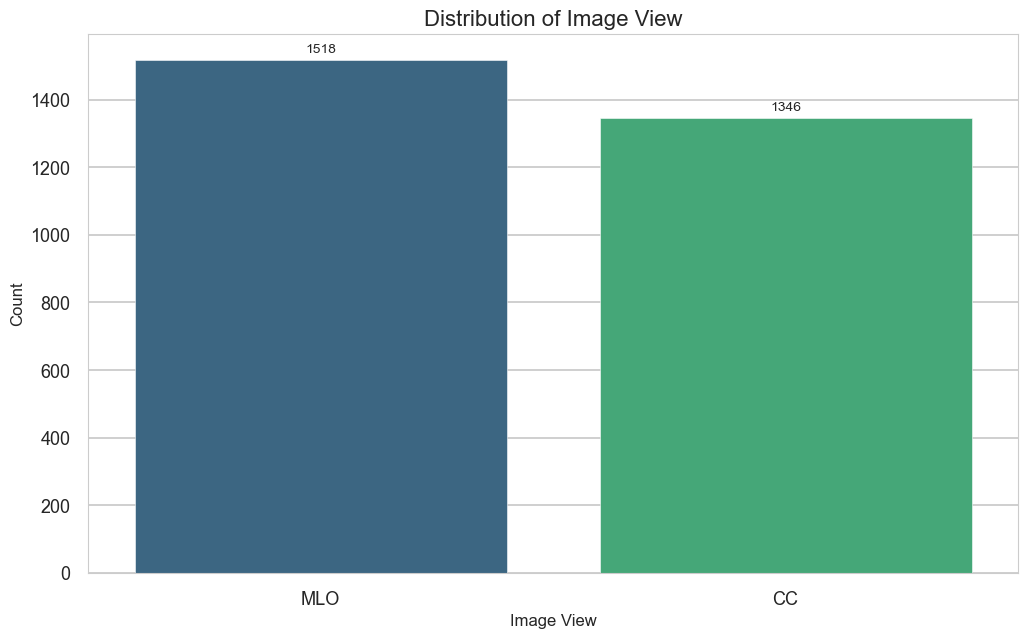

C:\Users\New User\AppData\Local\Temp\ipykernel_29832\600631769.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data[column_name], order=data[column_name].value_counts().index, palette=palette)


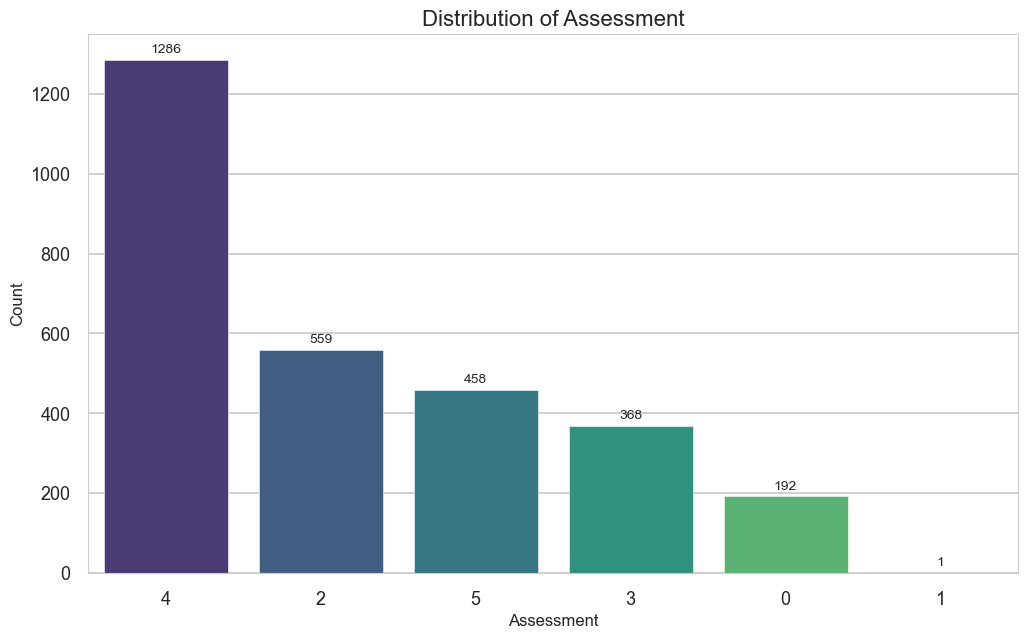

C:\Users\New User\AppData\Local\Temp\ipykernel_29832\600631769.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data[column_name], order=data[column_name].value_counts().index, palette=palette)


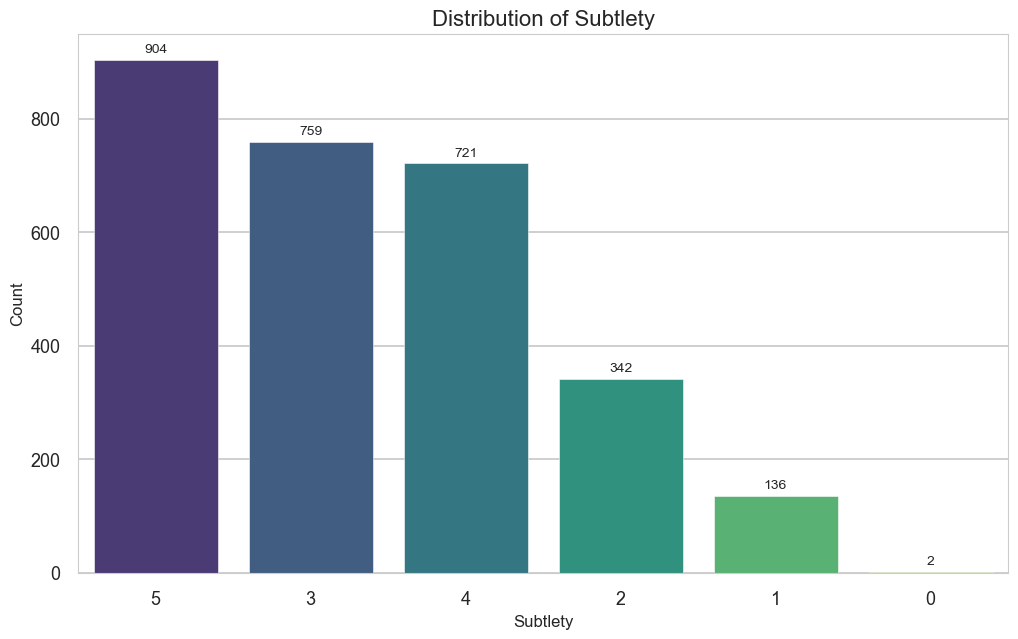

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# --- Configuration ---
# IMPORTANT: Make sure the path you provided is correct.
filepath = r"C:\Users\New User\Documents\GitHub\breast-cancer-detection-project\data\raw\CBIS-DDSM\csv"

# Set the style for the plots for better aesthetics
sns.set_style("whitegrid")
plt.style.use('seaborn-v0_8-talk')
plot_palette = "viridis" # You can change this to 'plasma', 'inferno', 'magma', etc.

# --- File Paths ---
mass_train_path = os.path.join(filepath, "mass_case_description_train_set.csv")
calc_train_path = os.path.join(filepath, "calc_case_description_train_set.csv")

# --- Load the Datasets ---
try:
    mass_train_df = pd.read_csv(mass_train_path)
    calc_train_df = pd.read_csv(calc_train_path)
    print("Successfully loaded the datasets.")
except FileNotFoundError as e:
    print(f"Error: {e}")
    print("\nPlease ensure the filepath is correct and the CSV files exist in that directory.")
    exit()

# --- Data Cleaning and Merging ---

# Clean column names by stripping whitespace for both dataframes
mass_train_df.columns = mass_train_df.columns.str.strip()
calc_train_df.columns = calc_train_df.columns.str.strip()

# Add a column to identify the abnormality type before merging
mass_train_df['abnormality_type'] = 'Mass'
calc_train_df['abnormality_type'] = 'Calcification'

# Combine the two dataframes into a single one for easier analysis
combined_df = pd.concat([mass_train_df, calc_train_df], ignore_index=True)

# Clean data in the relevant columns by stripping whitespace
# It's safer to convert to string, strip, then convert back to numeric if needed
str_cols_to_clean = ['left or right breast', 'image view', 'abnormality_type']
for col in str_cols_to_clean:
    if col in combined_df.columns:
        combined_df[col] = combined_df[col].astype(str).str.strip()

# For numeric columns, we should handle them carefully to avoid errors
# Let's clean them but ensure they remain numeric
num_cols_to_clean = ['assessment', 'subtlety', 'breast_density']
for col in num_cols_to_clean:
    if col in combined_df.columns:
        # astype(str) -> strip -> to_numeric. Coerce will turn errors into NaN
        combined_df[col] = pd.to_numeric(combined_df[col].astype(str).str.strip(), errors='coerce')

print("\n--- Mask Counts per Abnormality Type ---")
# Each row in the original dataframes corresponds to one abnormality/mask
print(f"Total number of Mass masks: {len(mass_train_df)}")
print(f"Total number of Calcification masks: {len(calc_train_df)}")
print(f"Total masks in the combined training set: {len(combined_df)}")


# --- Generate Individual Distribution Plots ---

def create_countplot(data, column_name, palette):
    """Helper function to create a styled countplot."""
    plt.figure(figsize=(12, 7))
    ax = sns.countplot(x=data[column_name], order=data[column_name].value_counts().index, palette=palette)
    plt.title(f'Distribution of {column_name.replace("_", " ").title()}', fontsize=16)
    plt.xlabel(column_name.replace("_", " ").title(), fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=0)
    # Add count labels on top of the bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', padding=3)
    plt.savefig(f"{column_name}_distribution.png", bbox_inches='tight')
    plt.show()

print("\n--- Generating Distribution Graphs ---")

# 1. Distribution of Abnormality Type
create_countplot(combined_df, 'abnormality_type', plot_palette)

# 2. Distribution of Breast Density
create_countplot(combined_df, 'breast_density', plot_palette)

# 3. Distribution of Left or Right Breast
create_countplot(combined_df, 'left or right breast', plot_palette)

# 4. Distribution of Image View (Yes, this is tracked!)
create_countplot(combined_df, 'image view', plot_palette)

# 5. Distribution of Assessment Score
create_countplot(combined_df, 'assessment', plot_palette)

# 6. Distribution of Subtlety Score
create_countplot(combined_df, 'subtlety', plot_palette)



Successfully loaded the datasets.

--- Unique Abnormality Feature Counts ---
Number of unique Mass Shape types: 18
Number of unique Mass Margin types: 15
Number of unique Calcification types: 45
Number of unique Calcification Distribution types: 9

--- Patient-Level Abnormality Analysis ---
Patients with only Mass abnormalities: 646
Patients with only Calcification abnormalities: 557
Patients with both types of abnormalities: 45


C:\Users\New User\AppData\Local\Temp\ipykernel_29832\3474410254.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(patient_counts.keys()), y=list(patient_counts.values()), palette='magma')


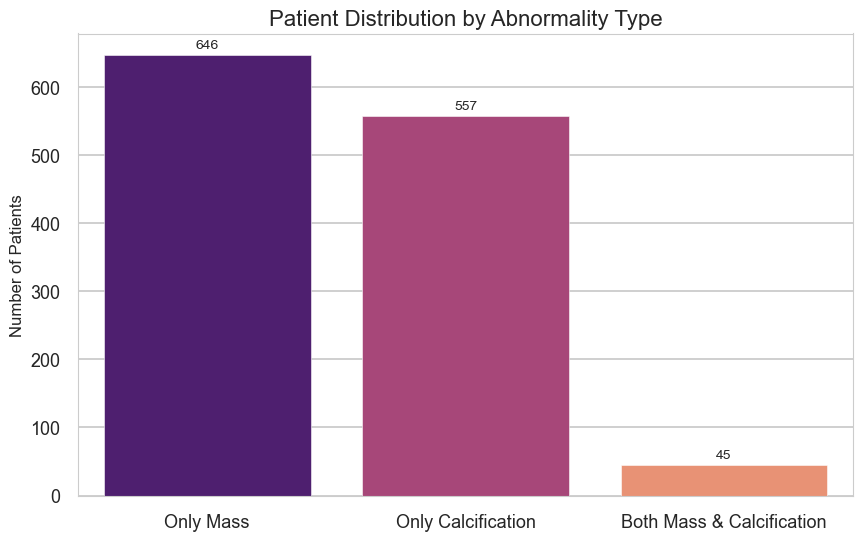


--- Generating Pathology Distribution Graphs ---


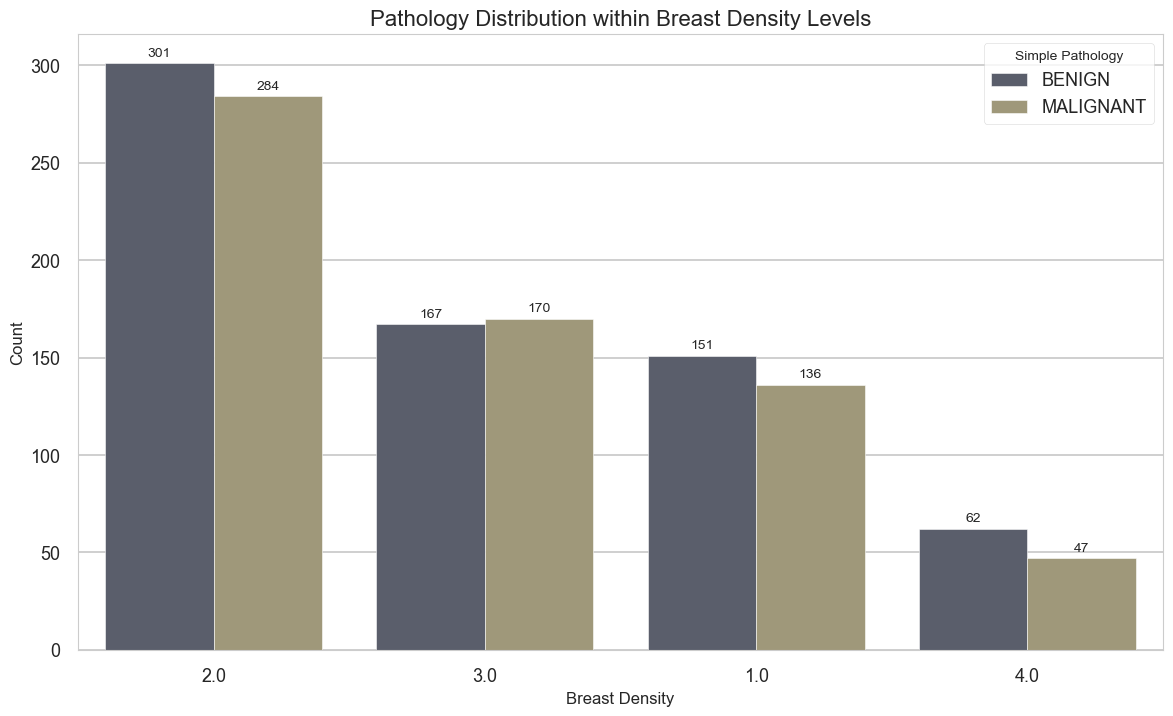

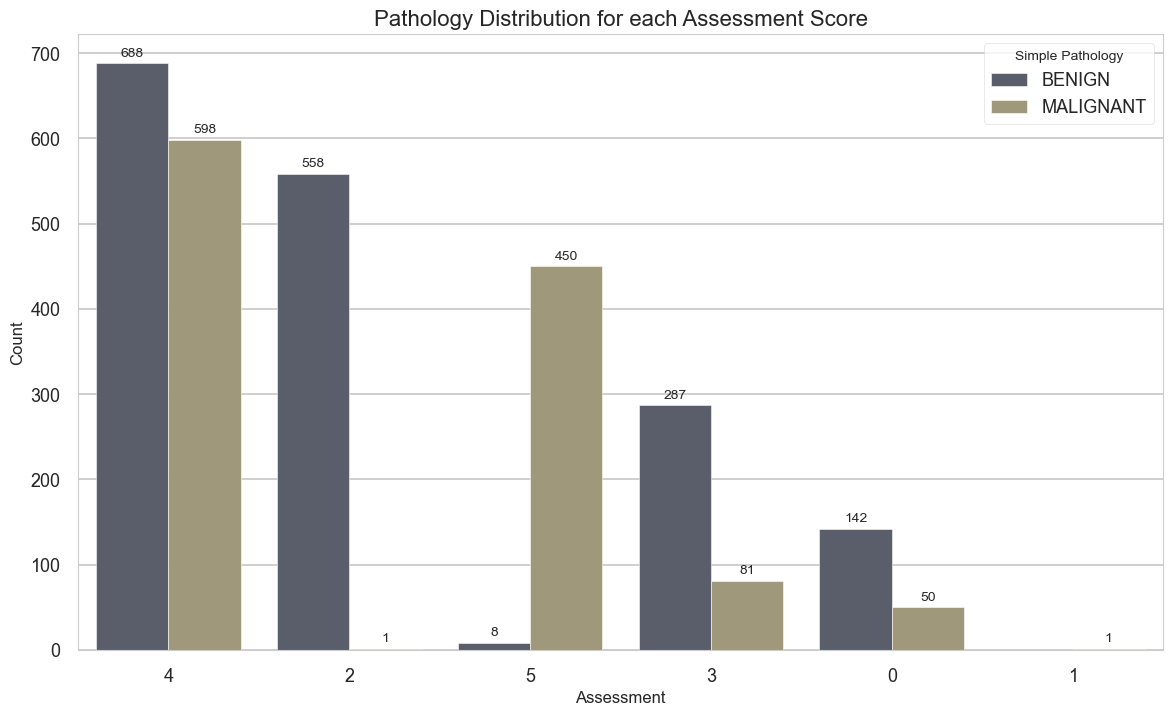

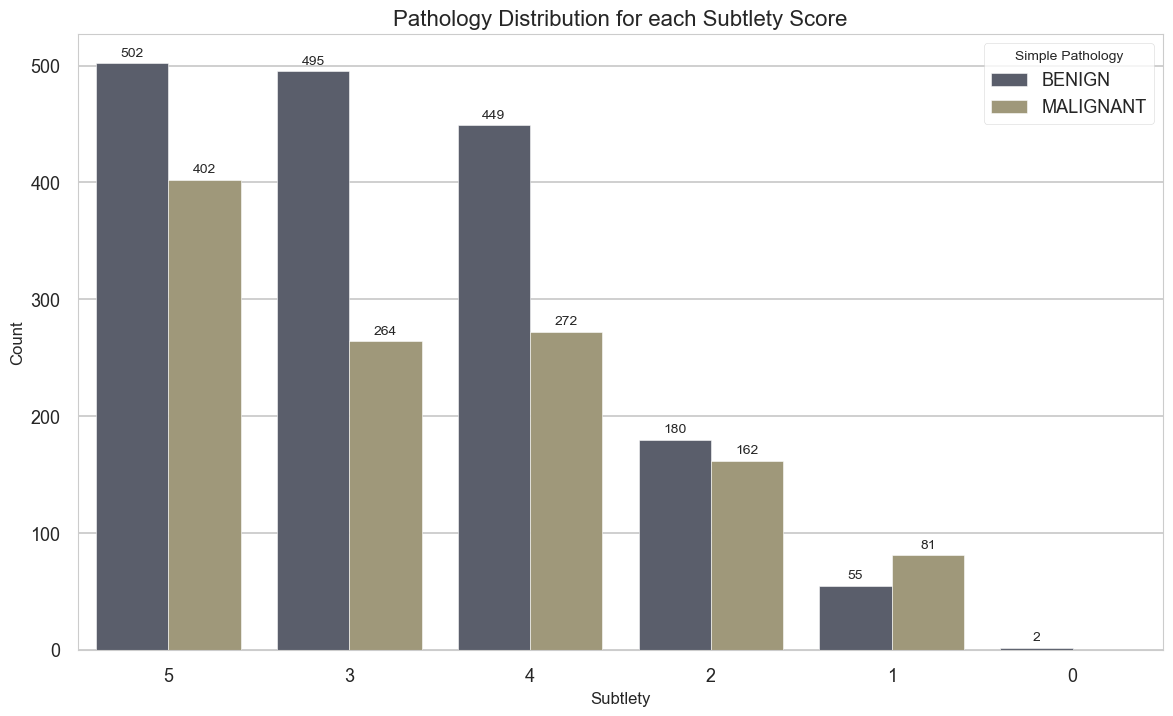


--- Generating Correlation Heatmap ---


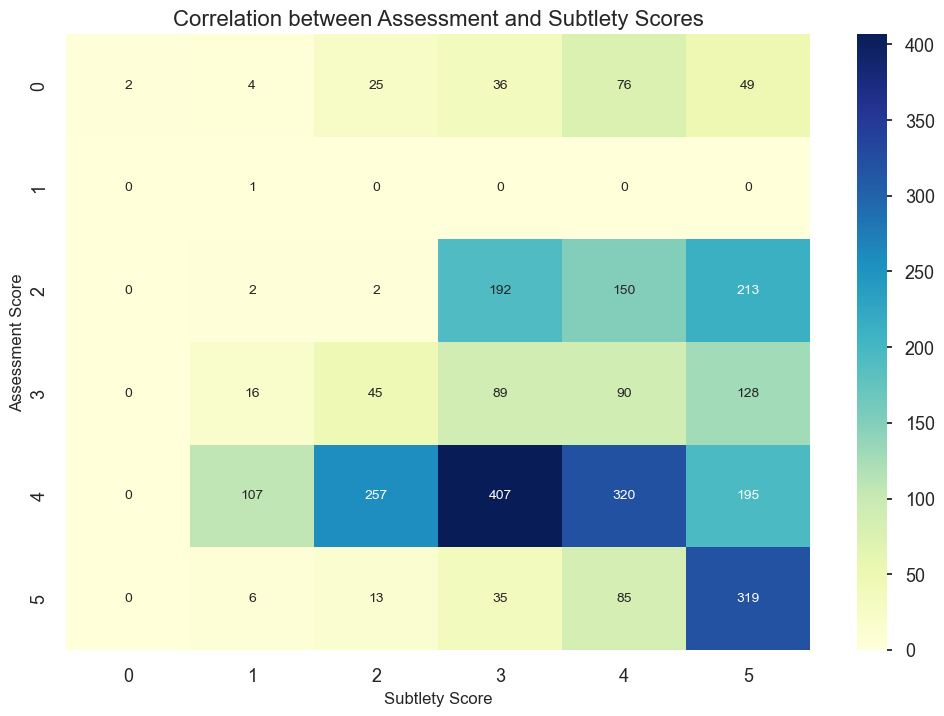

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# --- Configuration ---
# IMPORTANT: Make sure the path you provided is correct.
filepath = r"C:\Users\New User\Documents\GitHub\breast-cancer-detection-project\data\raw\CBIS-DDSM\csv"

# Set the style for the plots for better aesthetics
sns.set_style("whitegrid")
plt.style.use('seaborn-v0_8-talk')
plot_palette = "viridis"

# --- File Paths ---
mass_train_path = os.path.join(filepath, "mass_case_description_train_set.csv")
calc_train_path = os.path.join(filepath, "calc_case_description_train_set.csv")

# --- Load the Datasets ---
try:
    mass_train_df = pd.read_csv(mass_train_path)
    calc_train_df = pd.read_csv(calc_train_path)
    print("Successfully loaded the datasets.")
except FileNotFoundError as e:
    print(f"Error: {e}")
    print("\nPlease ensure the filepath is correct and the CSV files exist in that directory.")
    exit()

# --- Data Cleaning ---
def clean_df(df):
    """Cleans column names and relevant data in a dataframe."""
    df.columns = df.columns.str.strip()
    # Clean specific columns, handling potential errors
    for col in ['assessment', 'subtlety', 'breast_density']:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col].astype(str).str.strip(), errors='coerce')
    for col in ['pathology', 'left or right breast', 'image view']:
         if col in df.columns:
            df[col] = df[col].astype(str).str.strip()
    return df

mass_train_df = clean_df(mass_train_df)
calc_train_df = clean_df(calc_train_df)

# --- 1. Unique Mass and Calcification Type Counts ---
print("\n--- Unique Abnormality Feature Counts ---")
# Using .dropna() before .nunique() to not count NaN as a unique type
mass_shape_count = mass_train_df['mass shape'].dropna().nunique()
mass_margins_count = mass_train_df['mass margins'].dropna().nunique()
calc_type_count = calc_train_df['calc type'].dropna().nunique()
calc_dist_count = calc_train_df['calc distribution'].dropna().nunique()

print(f"Number of unique Mass Shape types: {mass_shape_count}")
print(f"Number of unique Mass Margin types: {mass_margins_count}")
print(f"Number of unique Calcification types: {calc_type_count}")
print(f"Number of unique Calcification Distribution types: {calc_dist_count}")


# --- 2. Patient-Level Abnormality Analysis ---
print("\n--- Patient-Level Abnormality Analysis ---")
mass_patients = set(mass_train_df['patient_id'])
calc_patients = set(calc_train_df['patient_id'])

both_types_patients = mass_patients.intersection(calc_patients)
only_mass_patients = mass_patients - calc_patients
only_calc_patients = calc_patients - mass_patients

patient_counts = {
    'Only Mass': len(only_mass_patients),
    'Only Calcification': len(only_calc_patients),
    'Both Mass & Calcification': len(both_types_patients)
}

print(f"Patients with only Mass abnormalities: {patient_counts['Only Mass']}")
print(f"Patients with only Calcification abnormalities: {patient_counts['Only Calcification']}")
print(f"Patients with both types of abnormalities: {patient_counts['Both Mass & Calcification']}")

# Plotting patient distribution
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=list(patient_counts.keys()), y=list(patient_counts.values()), palette='magma')
plt.title('Patient Distribution by Abnormality Type', fontsize=16)
plt.ylabel('Number of Patients', fontsize=12)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)
plt.show()


# --- Prepare Combined DataFrame for Further Analysis ---
# We will simplify the pathology for clearer grouped plots
pathology_mapping = {
    'MALIGNANT': 'MALIGNANT',
    'BENIGN': 'BENIGN',
    'BENIGN_WITHOUT_CALLBACK': 'BENIGN' # Grouping all benign cases
}
mass_train_df['simple_pathology'] = mass_train_df['pathology'].map(pathology_mapping)
calc_train_df['simple_pathology'] = calc_train_df['pathology'].map(pathology_mapping)

combined_df = pd.concat([mass_train_df, calc_train_df], ignore_index=True)


# --- 3. Pathology Distribution Within Categories ---
print("\n--- Generating Pathology Distribution Graphs ---")

def create_grouped_countplot(data, x_col, hue_col, palette, title):
    """Helper function for creating styled grouped bar charts."""
    plt.figure(figsize=(14, 8))
    ax = sns.countplot(data=data, x=x_col, hue=hue_col, order=data[x_col].value_counts().index, palette=palette)
    plt.title(title, fontsize=16)
    plt.xlabel(x_col.replace("_", " ").title(), fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.legend(title=hue_col.replace("_", " ").title())
    # Add labels to each bar
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', padding=3)
    plt.savefig(f"{x_col}_vs_{hue_col}_distribution.png", bbox_inches='tight')
    plt.show()

# Pathology vs. Breast Density
create_grouped_countplot(combined_df, 'breast_density', 'simple_pathology', 'cividis', 'Pathology Distribution within Breast Density Levels')

# Pathology vs. Assessment
create_grouped_countplot(combined_df, 'assessment', 'simple_pathology', 'cividis', 'Pathology Distribution for each Assessment Score')

# Pathology vs. Subtlety
create_grouped_countplot(combined_df, 'subtlety', 'simple_pathology', 'cividis', 'Pathology Distribution for each Subtlety Score')


# --- 4. Correlations Between Features ---
print("\n--- Generating Correlation Heatmap ---")
# Create a cross-tabulation of Assessment vs. Subtlety
correlation_df = pd.crosstab(combined_df['assessment'], combined_df['subtlety'])

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_df, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Correlation between Assessment and Subtlety Scores', fontsize=16)
plt.xlabel('Subtlety Score', fontsize=12)
plt.ylabel('Assessment Score', fontsize=12)
plt.savefig("correlation_heatmap.png", bbox_inches='tight')
plt.show()

